# Pymaceuticals Inc.


### Analysis
Analysis was completed on the data based on recent study of 249 mice with tumors, that received treatment with several different drug regimens. 
“The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.”
Based on the review of the information provided, and the generated figures and tables, the following observations were made:
1)  The drug regimen, Ramicane, performed slightly better than Capomulin, which was the drug of interest in the study.   Average tumor volume of Ramicane was 40.216745, whereas Capomulin was 40.675741.
2) Mice in the drug regimens Capomulin and Ramicane were monitored more closely with similar number of observed timepoints, and higher number than the rest of the drugs in the study.  This may also be due to the mice getting these drugs living longer than others in the study.
3) Of the four most promising drug treatments, distribution of tumor volume was significantly better (lower) in the Capomulin and Ramicane regimens as compared to the bottom two, Infubinol and Ceftamin.
4) Based on one mouse in the Capomulin treatment, significant reduction in tumor volume did not start until nearly halfway into the study.
5) There is a positive correlation between the weight of the mouse and the higher average tumor volume.    Observation is that the heavier, more overweight the mouse is increasing health risk of tumors. 


In [112]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_merged = pd.merge(study_results, mouse_metadata, on=["Mouse ID"])

# Display the data table for preview
mouse_study_merged.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [113]:
# Checking the number of mice.
len(mouse_study_merged["Mouse ID"].unique())

249

In [114]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#mouse_study_merged[mouse_study_merged.duplicated(subset = ["Mouse ID", "Timepoint"], keep=False)]
mouse_duplicated = mouse_study_merged[mouse_study_merged.duplicated(subset = ["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
mouse_duplicated

array(['g989'], dtype=object)

In [136]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_dupe_data = mouse_study_merged[mouse_study_merged["Mouse ID"] == "g989"]
mouse_dupe_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [116]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# removing duplicate mouse by its ID
mouse_study = mouse_study_merged.loc[mouse_study_merged["Mouse ID"] != "g989", :]

# print latest dataframe
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [117]:
# Checking the number of mice in the clean DataFrame.
len(mouse_study["Mouse ID"].unique())

248

## Summary Statistics

In [118]:
mouse_study.columns


Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [119]:
mouse_study.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,19.606383,50.435293,1.025000,12.757979,25.660106
std,14.094238,8.914197,1.139971,7.181998,3.935064
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.933454,1.000000,13.000000,27.000000
75%,30.000000,56.324075,2.000000,19.250000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [120]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_vol_per = mouse_study.groupby(["Drug Regimen"])

avg_tumor_vol = tumor_vol_per["Tumor Volume (mm3)"].mean()
med_tumor_vol = tumor_vol_per["Tumor Volume (mm3)"].median()
var_tumor_vol = tumor_vol_per["Tumor Volume (mm3)"].var()
std_tumor_vol = tumor_vol_per["Tumor Volume (mm3)"].std()
sem_tumor_vol = tumor_vol_per["Tumor Volume (mm3)"].sem()

stats = pd.DataFrame({"Mean Tumor Volume": avg_tumor_vol, "Median Tumor Volume": med_tumor_vol,
                      "Tumor Volume Variance" : var_tumor_vol, "Tumor Volume Std.Dev.": std_tumor_vol,
                      "Tumor Volume Std.Err.": sem_tumor_vol})
stats_summary = stats.groupby(["Drug Regimen"])

stats_summary.sum()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

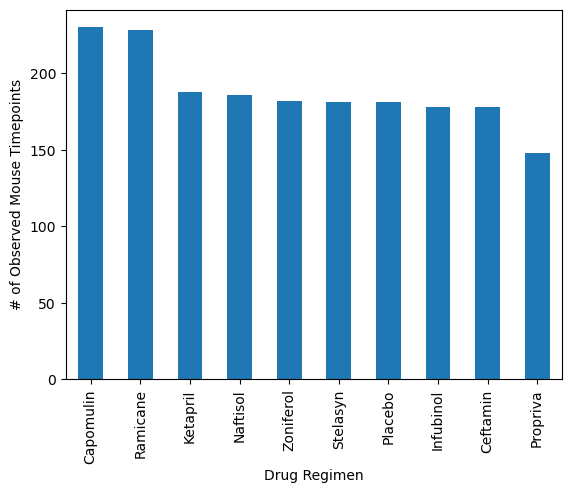

In [121]:
 #Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
    
rows = mouse_study["Drug Regimen"].value_counts()

tot_row_per_drug = rows.plot(kind="bar", xlabel="Drug Regimen", 
                             ylabel="# of Observed Mouse Timepoints")


plt.show()

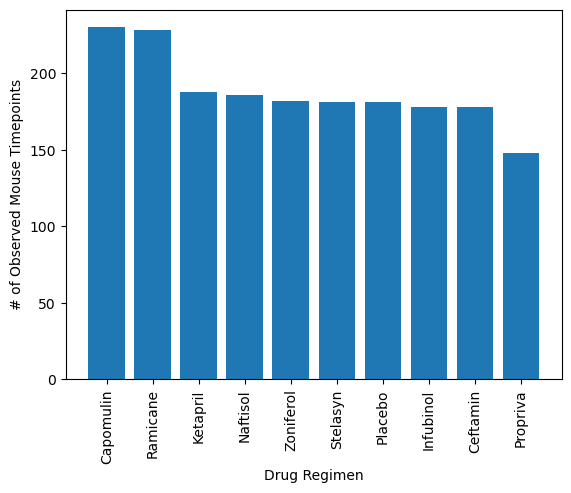

In [122]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

tot_mtps_per_drug = mouse_study["Drug Regimen"].value_counts()

x_axis = np.arange(len(tot_mtps_per_drug))


plt.bar(x_axis, rows)
plt.xticks(x_axis, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"], rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


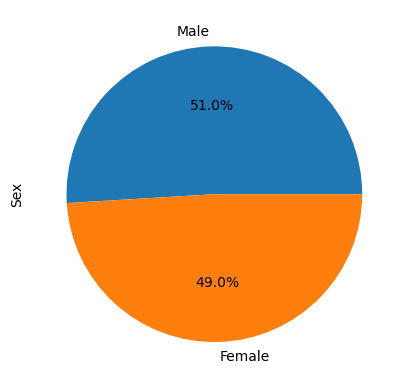

In [123]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

dist_female_male = mouse_study["Sex"].value_counts()
dist_chart = dist_female_male.plot(kind="pie", autopct='%1.1f%%')
plt.show()

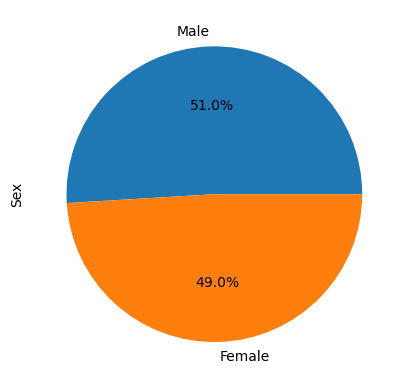

In [124]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

dist_fem_male = mouse_study["Sex"].value_counts()
plt.pie(dist_fem_male, labels=["Male", "Female"], autopct='%1.1f%%',  data="Sex",)
plt.ylabel("Sex")
plt.show()


### Quartiles, Outliers and Boxplots

In [125]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tmpt = mouse_study.groupby(['Mouse ID'])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_tmpt = pd.merge(last_tmpt, mouse_study_merged, on=["Mouse ID","Timepoint"])


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [127]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    final_tumor_vol = merge_tmpt.loc[merge_tmpt["Drug Regimen"] == drug, 'Tumor Volume (mm3)'] 

    # add subset 
    
    tumor_vol.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds

    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


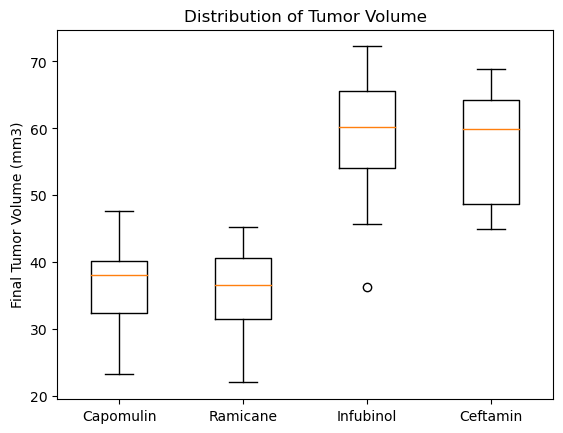

In [130]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig, axs = plt.subplots()
axs.set_title('Distribution of Tumor Volume')
axs.set_ylabel('Final Tumor Volume (mm3)')

plt.boxplot(tumor_vol)
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

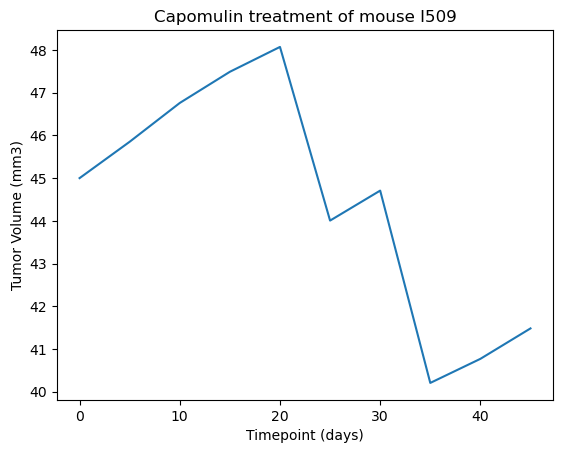

In [131]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capo_df = mouse_study[mouse_study['Drug Regimen'] == "Capomulin"]

mouse = capo_df[capo_df["Mouse ID"] == "l509"]

mouse.plot('Timepoint','Tumor Volume (mm3)')

plt.title("Capomulin treatment of mouse I509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend().remove()
plt.show()



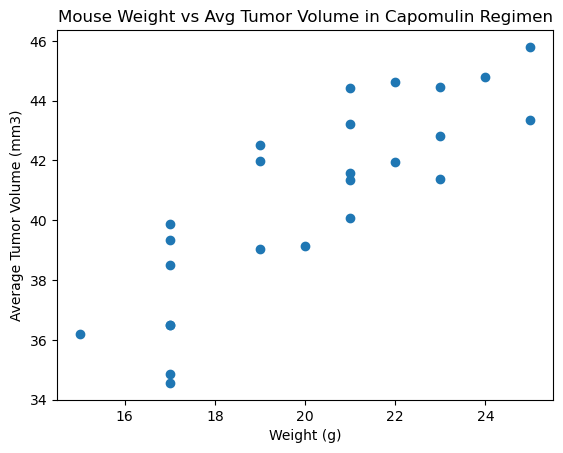

In [133]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

tum_avg_vol = capo_df.groupby(["Mouse ID"])['Tumor Volume (mm3)'].mean()
weight = capo_df.groupby(["Mouse ID"])['Weight (g)'].mean()

plt.scatter(weight,tum_avg_vol)

plt.title("Mouse Weight vs Avg Tumor Volume in Capomulin Regimen")
plt.xlabel('Weight (g)')
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


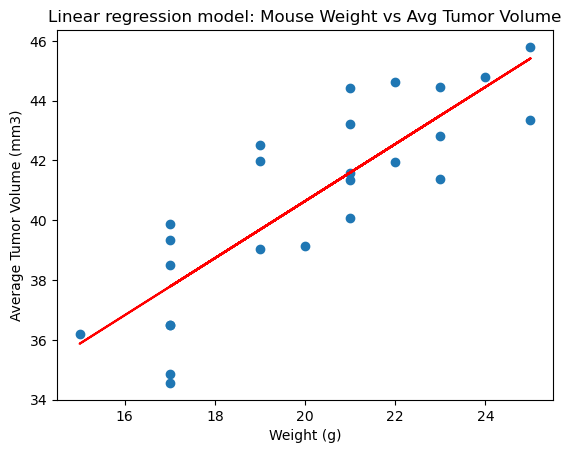

In [135]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(tum_avg_vol,weight)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_values = weight
y_values = tum_avg_vol

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Linear regression model: Mouse Weight vs Avg Tumor Volume")
plt.xlabel('Weight (g)')
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()